In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd

In [56]:
data = pd.read_csv("Housing.csv")

In [57]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [58]:
data.loc[data["mainroad"]=="yes", "mainroad"] = 1
data.loc[data["mainroad"]=="no", "mainroad"] = 0
data.loc[data["guestroom"]=="yes", "guestroom"] = 1
data.loc[data["guestroom"]=="no", "guestroom"] = 0
data.loc[data["basement"]=="yes", "basement"] = 1
data.loc[data["basement"]=="no", "basement"] = 0
data.loc[data["hotwaterheating"]=="yes", "hotwaterheating"] = 1
data.loc[data["hotwaterheating"]=="no", "hotwaterheating"] = 0
data.loc[data["airconditioning"]=="yes", "airconditioning"] = 1
data.loc[data["airconditioning"]=="no", "airconditioning"] = 0
data.loc[data["prefarea"]=="yes", "prefarea"] = 1
data.loc[data["prefarea"]=="no", "prefarea"] = 0
data.loc[data["furnishingstatus"]=="furnished", "furnishingstatus"] = 2
data.loc[data["furnishingstatus"]=="semi-furnished", "furnishingstatus"] = 1
data.loc[data["furnishingstatus"]=="unfurnished", "furnishingstatus"] = 0

In [59]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


<AxesSubplot:>

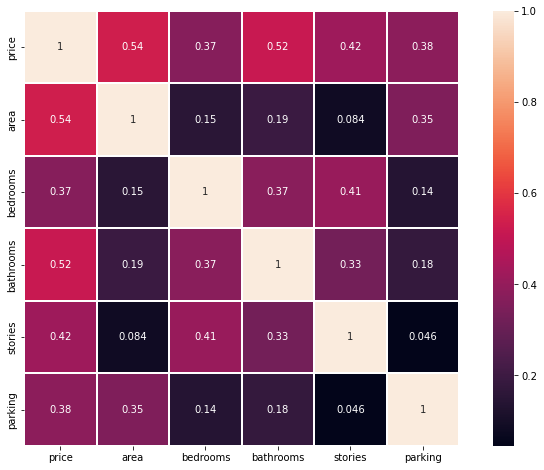

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = data.corr() 
correction=abs(correlations)
plt.figure(figsize=(12,8))
# plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(correction,linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)

In [61]:
import numpy as np
x_data = data.loc[:, "area":"furnishingstatus"]
y_data = pd.DataFrame(data.loc[:, "price"])

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [64]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
x_train = x_train.values
x_test = x_test.values

x_train = np.nan_to_num(x_train, copy=False)
x_test = np.nan_to_num(x_test, copy=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train.values
y_test = y_test.values

In [67]:
x_train.shape, y_train.shape

((436, 12), (436, 1))

In [68]:
x_test.shape, y_test.shape

((109, 12), (109, 1))

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

## KNN

0.6329254363132173 4


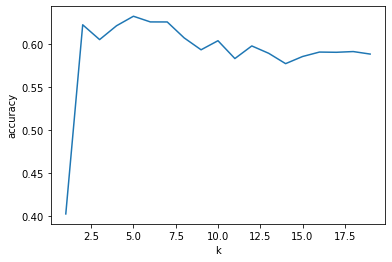

In [76]:
best_k = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    knn_acc = knn.score(x_test, y_test)
    best_k.append(knn_acc)
print(max(best_k), np.argmax(best_k))
plt.plot(range(1, 20), best_k)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

Text(0, 0.5, 'y_test')

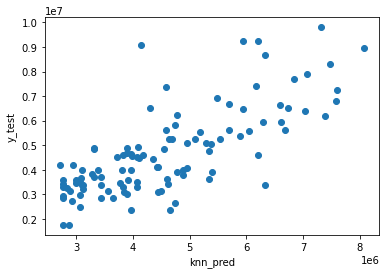

In [17]:
knn = KNeighborsRegressor(n_neighbors=np.argmax(best_k))
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
plt.scatter(knn_pred, y_test)
plt.xlabel("knn_pred")
plt.ylabel("y_test")

## Linear Regression

0.5511863746294404


Text(0, 0.5, 'y_test')

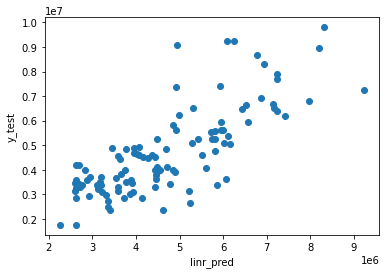

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
linr_pred = lin_reg.predict(x_test)
linr_acc = knn.score(x_test, y_test)
print(linr_acc)

plt.scatter(linr_pred, y_test)
plt.xlabel("linr_pred")
plt.ylabel("y_test")

## Logistic Regression

0.009174311926605505


Text(0, 0.5, 'y_test')

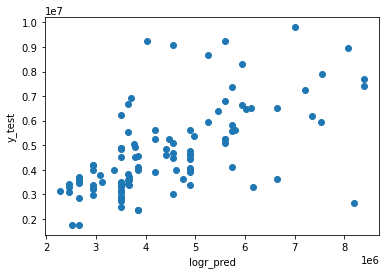

In [19]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
logr_pred = log_reg.predict(x_test)
logr_acc = log_reg.score(x_test, y_test)
print(logr_acc)

plt.scatter(logr_pred, y_test)
plt.xlabel("logr_pred")
plt.ylabel("y_test")

## LDA

0.009174311926605505


Text(0, 0.5, 'y_test')

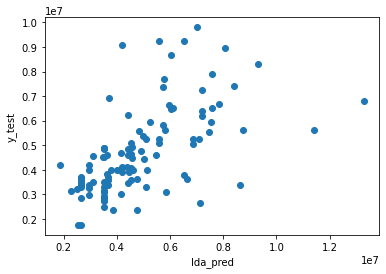

In [20]:
lda = LDA(n_components=1)
lda.fit(x_train, y_train)
lda_pred = lda.predict(x_test)
lda_acc = lda.score(x_test, y_test)
print(lda_acc)

plt.scatter(lda_pred, y_test)
plt.xlabel("lda_pred")
plt.ylabel("y_test")

## Decision Tree

0.08377082017645554


Text(0, 0.5, 'y_test')

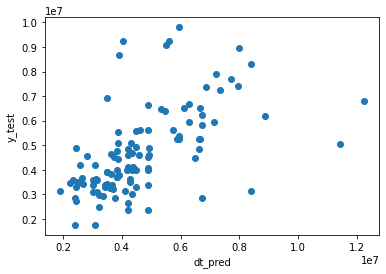

In [21]:
dt = tree.DecisionTreeRegressor(criterion="squared_error")
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = dt.score(x_test, y_test)
print(dt_acc)

plt.scatter(dt_pred, y_test)
plt.xlabel("dt_pred")
plt.ylabel("y_test")

## Random Forest

best_acc:  0.5613282986787436  best_dep:  5  best_est: 9


Text(0, 0.5, 'y_test')

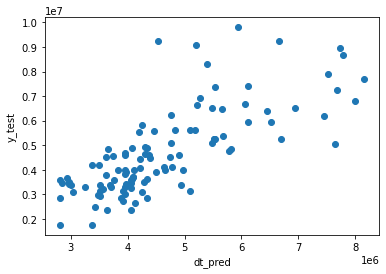

In [22]:
best_acc = 0
best_est = 0
best_dep = 0
best_pred = []
max
for i in range(1,10):
    for j in range(1, 10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=j)
        rf.fit(x_train, y_train)
        rf_pred = rf.predict(x_test)
        rf_acc = rf.score(x_test, y_test).mean()
        if rf_acc > best_acc:
            best_acc = rf_acc
            best_dep = j
            best_est = i
            best_pred = rf_pred

print("best_acc: ", best_acc, " best_dep: ", best_dep, " best_est:", best_est)
plt.scatter(best_pred, y_test)
plt.xlabel("dt_pred")
plt.ylabel("y_test")

## SVM

-0.04429115533787664


Text(0, 0.5, 'y_test')

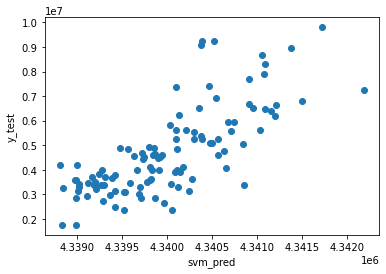

In [23]:
svm = SVR(kernel="linear")
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = svm.score(x_test, y_test)
print(svm_acc)

plt.scatter(svm_pred, y_test)
plt.xlabel("svm_pred")
plt.ylabel("y_test")

-0.044881705079622414


Text(0, 0.5, 'y_test')

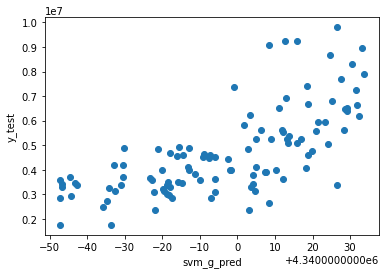

In [24]:
svm_g = SVR(kernel="rbf")
svm_g.fit(x_train, y_train)
svm_g_pred = svm_g.predict(x_test)
svm_g_acc = svm_g.score(x_test, y_test)
print(svm_g_acc)

plt.scatter(svm_g_pred, y_test)
plt.xlabel("svm_g_pred")
plt.ylabel("y_test")

-0.044890941478375135


Text(0, 0.5, 'y_test')

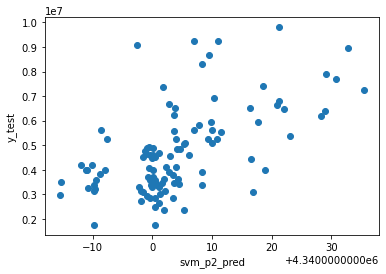

In [25]:
svm_p2 = SVR(kernel="poly", degree=2)
svm_p2.fit(x_train, y_train)
svm_p2_pred = svm_p2.predict(x_test)
svm_p2_acc = svm_p2.score(x_test, y_test)
print(svm_p2_acc)

plt.scatter(svm_p2_pred, y_test)
plt.xlabel("svm_p2_pred")
plt.ylabel("y_test")

## AdaBoost

0.4915349110758763


Text(0, 0.5, 'y_test')

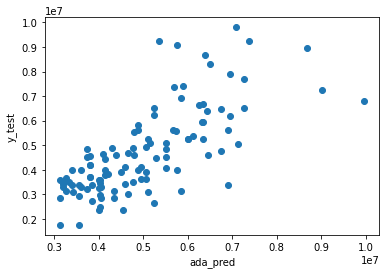

In [26]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
ada_acc = ada.score(x_test, y_test)
print(ada_acc)

plt.scatter(ada_pred, y_test)
plt.xlabel("ada_pred")
plt.ylabel("y_test")

## Comparison

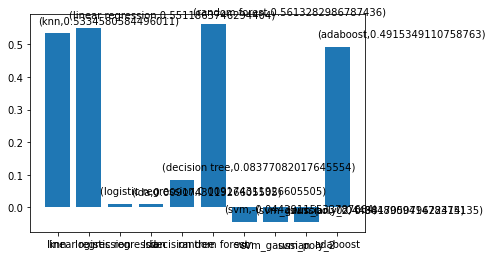

In [27]:
dict = {"knn": knn_acc,
       "linear regression": linr_acc,
       "logistic regression": logr_acc,
       "lda": lda_acc,
       "decision tree": dt_acc,
       "random forest": best_acc,
       "svm": svm_acc,
       "svm_gaussian": svm_g_acc,
       "svm_poly_2": svm_p2_acc,
       "adaboost": ada_acc}
plt.bar(dict.keys(), dict.values())
for a,b in dict.items():
    plt.annotate('(%s,%s)'%(a,b),xy=(a,b),xytext=(-20,10),
                 textcoords='offset points')

## Final Prediction Value

In [34]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [41]:
result = pd.DataFrame(data=x_test,
            columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'])
result["price"] = y_test
result["predict"] = best_pred
result

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,predict
0,0.619910,0.049317,1.391175,2.587257,0.399468,-0.481288,-0.753887,-0.213456,1.461742,1.456524,-0.559690,-1.234299,7700000,8.153935e+06
1,0.935090,0.049317,1.391175,-0.915985,0.399468,2.077757,1.326459,-0.213456,1.461742,1.456524,-0.559690,-1.234299,8680000,7.776480e+06
2,2.198144,0.049317,-0.578151,-0.915985,0.399468,-0.481288,-0.753887,-0.213456,-0.684115,-0.823707,-0.559690,0.101072,4515000,4.751414e+06
3,-0.257924,1.393205,-0.578151,0.251762,0.399468,-0.481288,-0.753887,-0.213456,-0.684115,-0.823707,-0.559690,0.101072,3500000,4.279936e+06
4,0.605902,0.049317,1.391175,-0.915985,0.399468,2.077757,1.326459,4.684802,-0.684115,-0.823707,-0.559690,-1.234299,5383000,5.668840e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-1.343543,0.049317,-0.578151,1.419509,0.399468,-0.481288,-0.753887,4.684802,1.461742,-0.823707,1.786703,0.101072,3640000,4.070909e+06
105,-0.934977,-1.294571,1.391175,-0.915985,-2.503331,-0.481288,1.326459,-0.213456,-0.684115,-0.823707,-0.559690,0.101072,3815000,3.957796e+06
106,-0.762211,0.049317,-0.578151,-0.915985,0.399468,-0.481288,-0.753887,-0.213456,-0.684115,-0.823707,1.786703,0.101072,4550000,3.737145e+06
107,-1.285176,0.049317,-0.578151,-0.915985,-2.503331,-0.481288,-0.753887,-0.213456,-0.684115,-0.823707,-0.559690,0.101072,1767150,3.382346e+06
